# **Task 1: Playing with Image**

('Size of RGB Image: ', (447, 794, 3))
('Type of RGB Image: ', dtype('uint8'))
('Size of grayscale Image: ', (447, 794))
('Type of grayscale Image: ', dtype('uint8'))


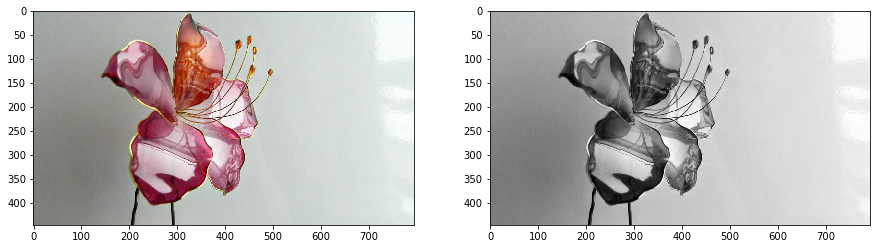

In [60]:
import matplotlib.pyplot as plt
import numpy as np

#Loading RGB image using imread
img = plt.imread('img1_flower.jpg')

# displaying size and type of RGB image
print('Size of RGB Image: ',img.shape)
print('Type of RGB Image: ',img.dtype)

#RGB to grayscale
grayValue = 0.07 * img[:,:,0] + 0.72 * img[:,:,1] + 0.21 * img[:,:,2]
gray_img = grayValue.astype(np.uint8)

# displaying size and type of grayscale image
print('Size of grayscale Image: ',gray_img.shape)
print('Type of grayscale Image: ',gray_img.dtype)

#Displaying images side by side
f, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(img)
axarr[1].imshow(gray_img, cmap='gray')

#converting to binary and saving to disk
binary_image = gray_img > 128 
plt.imsave('new_binary.jpg', binary_image,  cmap='gray')

# **Task 2: Image Bit Slicing**

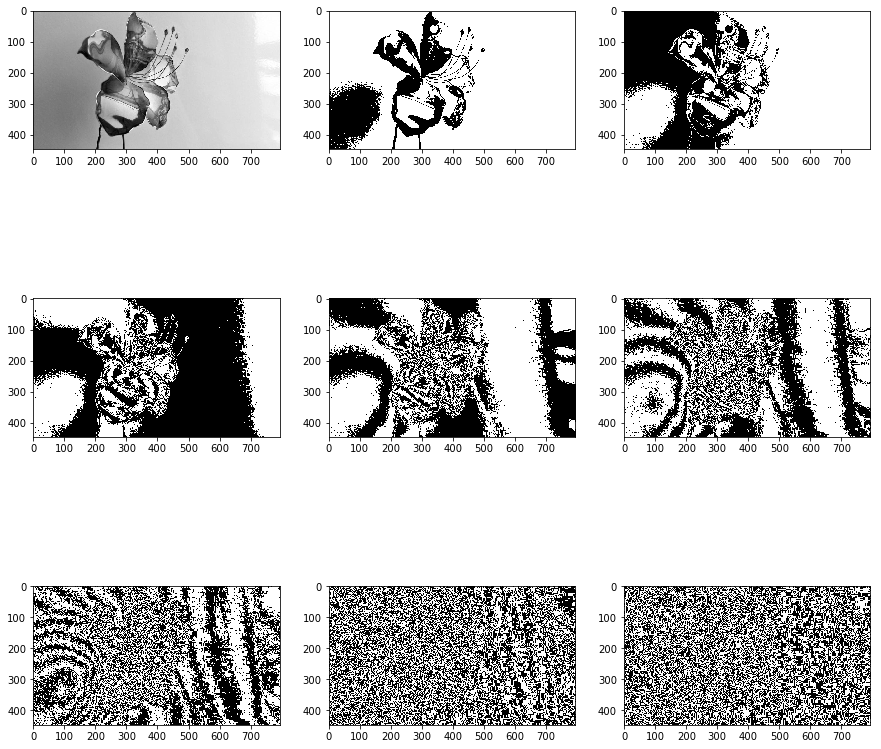

In [79]:
import numpy as np

mask = np.array([128, 64, 32, 16, 8, 4, 2, 1])
bit_planes = np.zeros([8, gray_img.shape[0], gray_img.shape[1] ])  #initializing array of size (8 * 447 * 794)
bit_planes = bit_planes.astype('bool')  #changing array type to boolean
for i in range(7,-1, -1):  # 7 -> 1
    bit_planes[i] = gray_img & mask[i]  #extracting different bits one by one
    
#Displaying bit planes along with original image
f, axarr = plt.subplots(3,3,figsize=(15,15))
axarr[0,1].imshow(img)
for i in xrange(3):
    for j in xrange(3):
        if i==0 and j == 0:  
            axarr[i,j].imshow(gray_img, cmap='gray')
            continue
        axarr[i,j].imshow(bit_planes[ i*3 + j-1], cmap='gray')

#Simplest image compressing algorithm -> just get new image through combining 2 layers 
compressed_image = bit_planes[2] + bit_planes[1]
#saving to disk
plt.imsave('compressed_image.jpg', compressed_image,  cmap='gray')  
    

# **Task 3: Histogram**

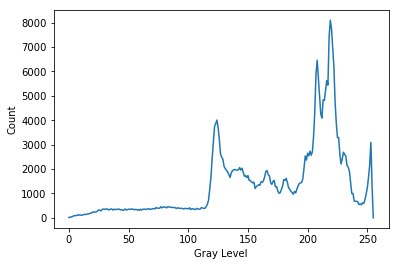

In [104]:
histo = np.zeros(256)
for gray_val in range(histo.shape[0]):
   
    histo[gray_val] = np.sum(gray_img==gray_val)

plt.plot(np.arange(0,256),histo)
plt.ylabel('Count')
plt.xlabel('Gray Level')


# **Task 4: Basic Global Thresholding**

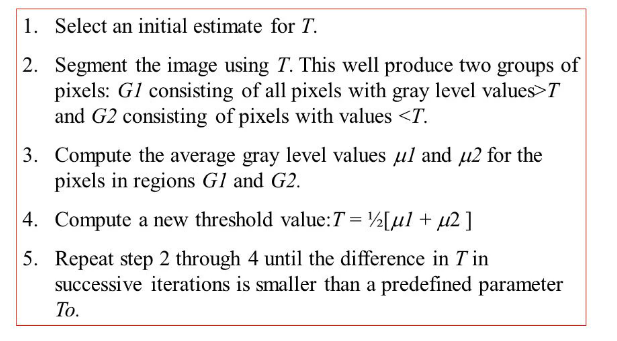

Old Threshold:  6.1138625 	 New Threshold:  62.61558381728457
Old Threshold:  62.61558381728457 	 New Threshold:  80.01128373281873
Old Threshold:  80.01128373281873 	 New Threshold:  85.85026405225068
Old Threshold:  85.85026405225068 	 New Threshold:  86.20622476177728
Old Threshold:  86.20622476177728 	 New Threshold:  86.28216579938231
Old Threshold:  86.28216579938231 	 New Threshold:  86.28216579938231


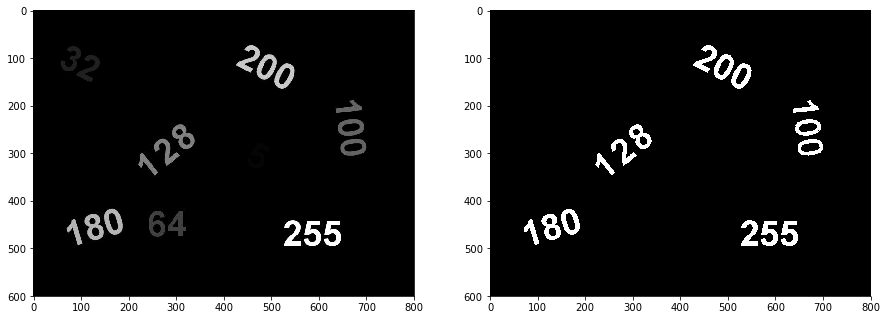

In [111]:
#Loading RGB image using imread
gray_img_numbers = plt.imread('numbers.jpg')

old_thresh = 0
curr_thresh = np.mean(gray_img_numbers)

#Finding optimal threshold 
while np.abs(old_thresh - curr_thresh) > 0:
    g1_mask = gray_img_numbers <  curr_thresh
    g2_mask = gray_img_numbers >=  curr_thresh
    g1 = gray_img_numbers[g1_mask]
    g2 = gray_img_numbers[g2_mask]
    old_thresh = curr_thresh
    curr_thresh = ( np.mean(g1) +np.mean(g2) )/2
    print 'Old Threshold: ',old_thresh,'\t New Threshold: ',curr_thresh
    

#Displaying images side by side
f, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(gray_img_numbers, cmap='gray')
axarr[1].imshow(gray_img_numbers>curr_thresh, cmap='gray')

